# Homework 3 — Stochastic vs Deterministic Enzyme Kinetics
Simulate enzyme kinetics using Gillespie and compare to ODE solution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def gillespie_sim(k1, k2, E0, S0, C0, P0, t_max):
    t = 0.0
    E, S, C, P = E0, S0, C0, P0
    times=[t]; S_counts=[S]
    while t < t_max and (S>0 or C>0):
        a1 = k1*E*S; a2 = k2*C; a0 = a1+a2
        if a0==0: break
        t += np.random.exponential(1/a0)
        r = np.random.rand()
        if r < a1/a0 and S>0 and E>0:
            E-=1; S-=1; C+=1
        elif C>0:
            C-=1; E+=1; P+=1
        times.append(t); S_counts.append(S)
    return np.array(times), np.array(S_counts)


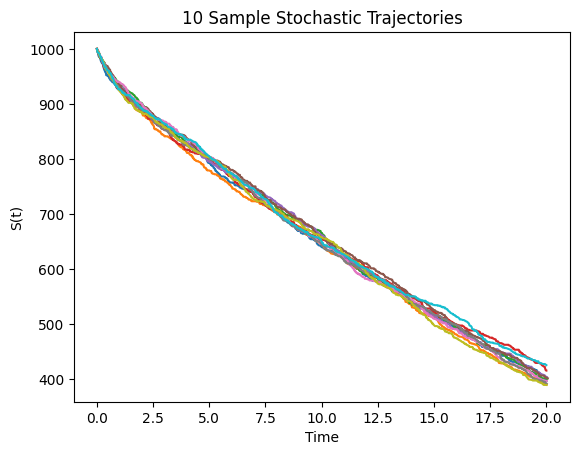

In [2]:
k1=0.001; k2=0.5; E0,S0,C0,P0 = 100,1000,0,0; t_max=20; num_sims=500
all_times=[]; all_S=[]
for _ in range(num_sims):
    t_arr,S_arr = gillespie_sim(k1,k2,E0,S0,C0,P0,t_max)
    all_times.append(t_arr); all_S.append(S_arr)
plt.figure()
for i in range(10): plt.plot(all_times[i],all_S[i])
plt.xlabel('Time'); plt.ylabel('S(t)'); plt.title('10 Sample Stochastic Trajectories'); plt.show()


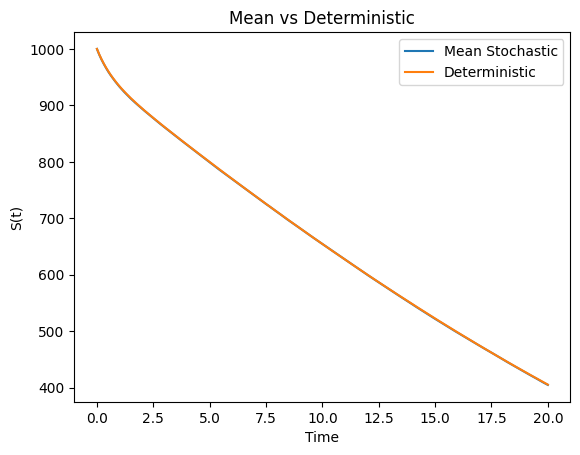

In [3]:
common_t = np.linspace(0,t_max,200)
interp_S = np.zeros((num_sims,len(common_t)))
for i in range(num_sims): interp_S[i]=np.interp(common_t,all_times[i],all_S[i])
mean_S = interp_S.mean(axis=0)
def ode_model(t,y): E,S,C,P=y; return [-k1*E*S+k2*C, -k1*E*S, k1*E*S-k2*C, k2*C]
sol = solve_ivp(ode_model,[0,t_max],[E0,S0,C0,P0],t_eval=common_t)
S_det = sol.y[1]
plt.figure(); plt.plot(common_t,mean_S,label='Mean Stochastic'); plt.plot(common_t,S_det,label='Deterministic')
plt.xlabel('Time'); plt.ylabel('S(t)'); plt.legend(); plt.title('Mean vs Deterministic'); plt.show()


### Discussion
The mean stochastic trajectory matches the deterministic solution because large molecule counts make stochastic fluctuations average out.